In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import calendar

In [3]:
# Loading the dataset

df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
# Null values

df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
# Renaming Columns for better understanding of the data

df.columns = ['State','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [10]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [17]:
# Converting date column into datetime format

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [18]:
# Converting Frequency and Region to categorical data

df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [19]:
# Creating a Month column and into integer format

df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))

In [20]:
# Month value to month names and drop the original month column

df['Month_name']  = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df.drop(columns='Month', inplace = True)

In [22]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [23]:
stats = df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
print(round(stats.describe().T,2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [27]:
# Statistics according to Region

region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
print(round(region_stats,2))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


C:\Users\Ls sampson cyrus\AppData\Local\Temp\ipykernel_9200\2815392499.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()


In [28]:
# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

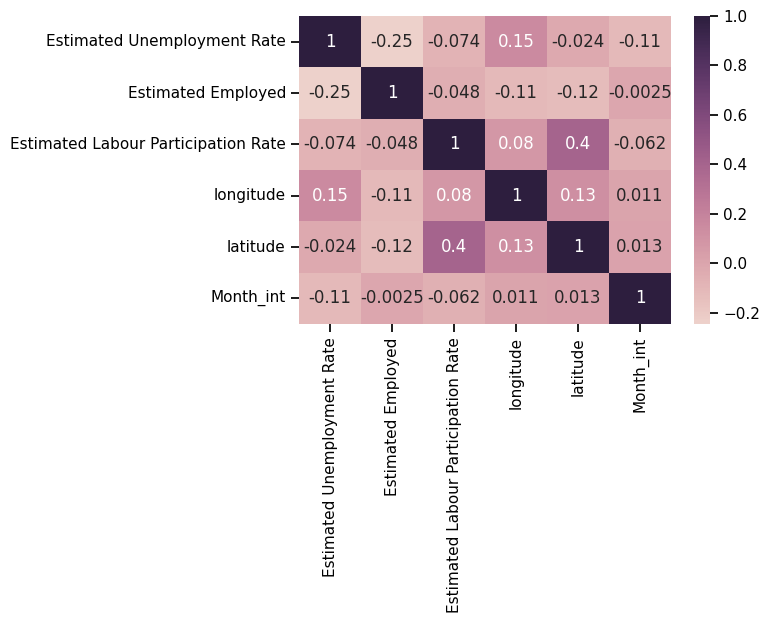

In [35]:
# Heatmap

fig = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
fig = fig.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook',font_scale=1)
sns.heatmap(data= fig,annot= True, cmap= sns.cubehelix_palette(as_cmap= True))

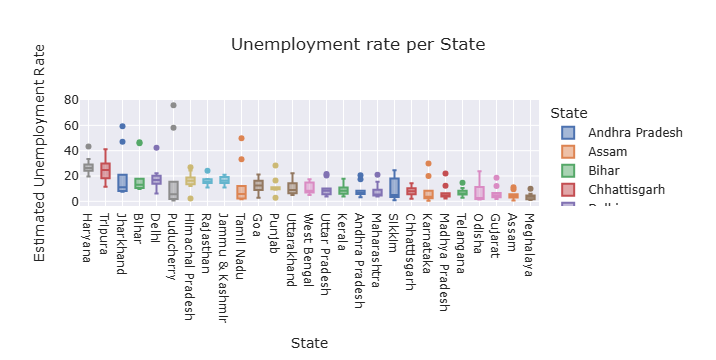

In [41]:
# Box plot of Unemployment rate per State

import plotly.express as px
fig = px.box(df, x ='State',y='Estimated Unemployment Rate',color= 'State', title = 'Unemployment rate per State',template= 'seaborn')
fig.update_layout(xaxis={'categoryorder' : 'total descending'})
fig.show()


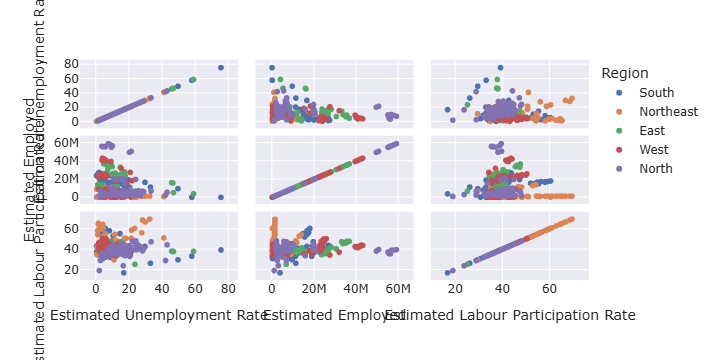

In [47]:
# Scatter matrix of Employed and unemployed rates

fig = px.scatter_matrix(df,template='seaborn', dimensions=['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate'], color = 'Region')
fig.show()                                                      

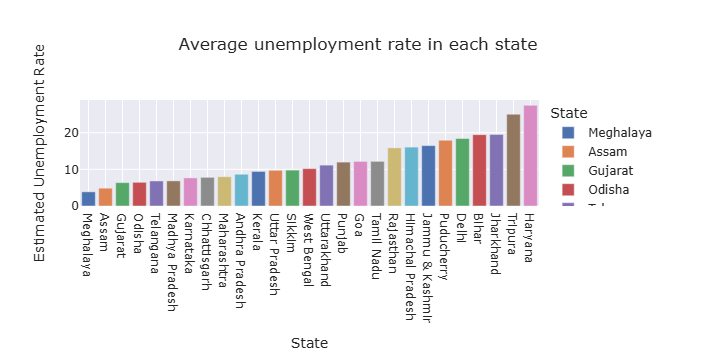

In [52]:
# Bar plot showing the avg unemployment rate in each state 

plot_unemployment = df[['Estimated Unemployment Rate','State']]
df_unemployed = plot_unemployment.groupby('State').mean().reset_index()
df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed,x='State',y = 'Estimated Unemployment Rate', color = 'State',title = 'Average unemployment rate in each state',template ='seaborn')
fig.show()

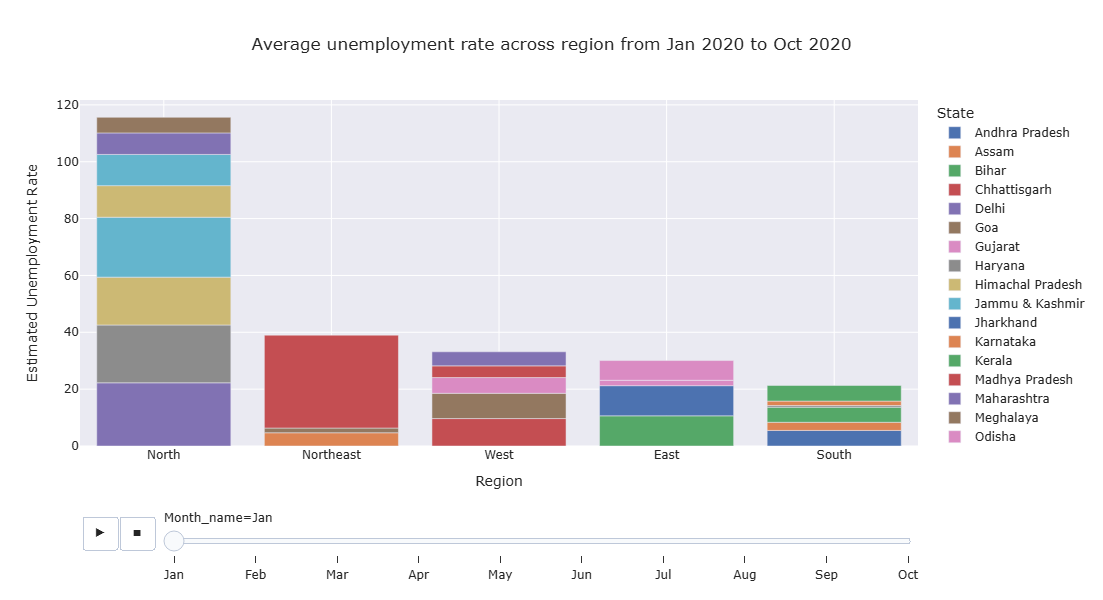

In [56]:
fig = px.bar(df,x='Region',y = 'Estimated Unemployment Rate', color = 'State',title = 'Average unemployment rate across region from Jan 2020 to Oct 2020',template ='seaborn',height=600,animation_frame='Month_name')
fig.update_layout(xaxis ={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.show()

C:\Users\Ls sampson cyrus\AppData\Local\Temp\ipykernel_9200\3114399243.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Ls sampson cyrus\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Ls sampson cyrus\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



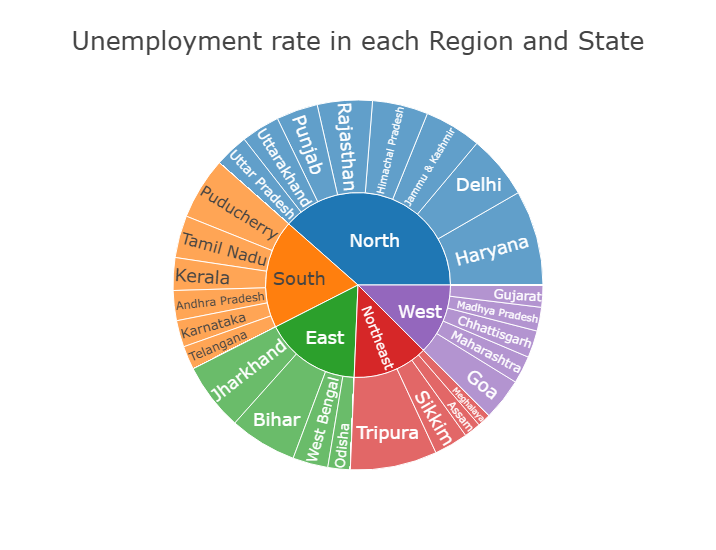

In [58]:
# Sunburst Chart of Unemployment rate in each State and Region

unemployed_df = df[['State','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
unemployed  = unemployed_df.groupby(['Region','State'])['Estimated Unemployment Rate'].mean().reset_index()

# Chart
fig = px.sunburst(unemployed,path = ['Region','State'],values = 'Estimated Unemployment Rate', color_continuous_scale= 'rdylbu', title ='Unemployment rate in each Region and State', height = 550 , template = 'presentation')
fig.show()

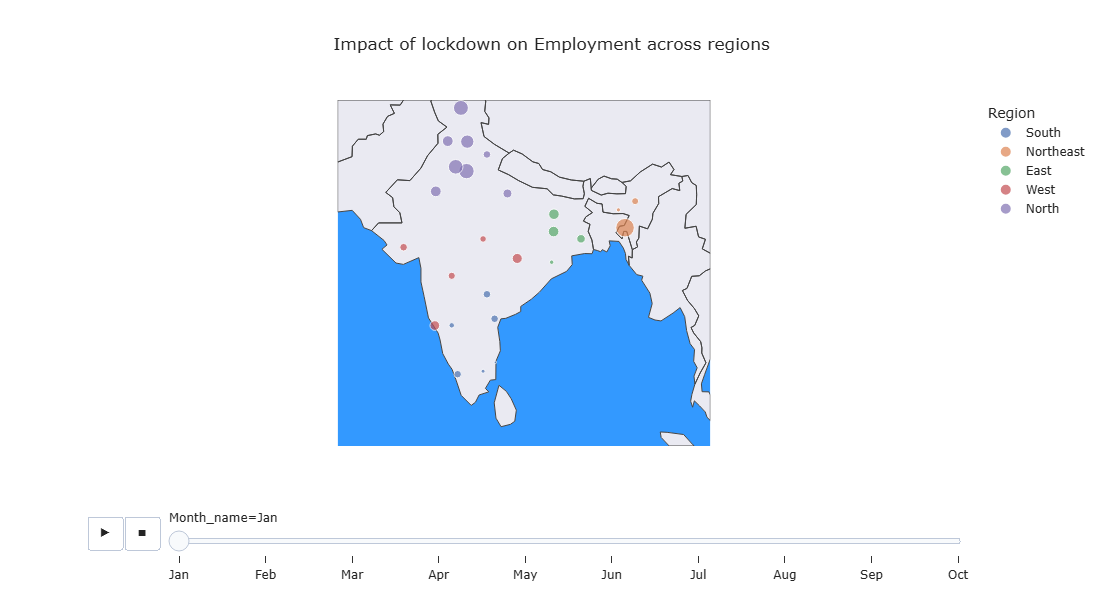

In [66]:
# Impact of Lockdown on Employed estimated states

fig = px.scatter_geo(df,'longitude','latitude',color = 'Region', hover_name='State',size='Estimated Unemployment Rate',animation_frame='Month_name',scope='asia',template='seaborn',title = 'Impact of lockdown on Employment across regions')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range = [65,100], oceancolor = '#3399FF',showocean = True)
fig.update_layout(width=1000, height=600)
fig.show()

In [69]:
# Understanding how lockdown affected the employment rate by state

b4_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] <= 4)]

lockdown = df[(df['Month_int'] >= 4) & (df['Month_int'] <= 7)]

# Mean employment rate before lockdown
mb4_lockdown = b4_lockdown.groupby('State')['Estimated Unemployment Rate'].mean().reset_index()

# Mean employment rate after lockdown
m_lockdown = lockdown.groupby('State')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the means to get the total
m_lockdown['Unemployment Rate before lockdown'] = mb4_lockdown['Estimated Unemployment Rate']
m_lockdown.columns = ['State','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
m_lockdown.head()

,State,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


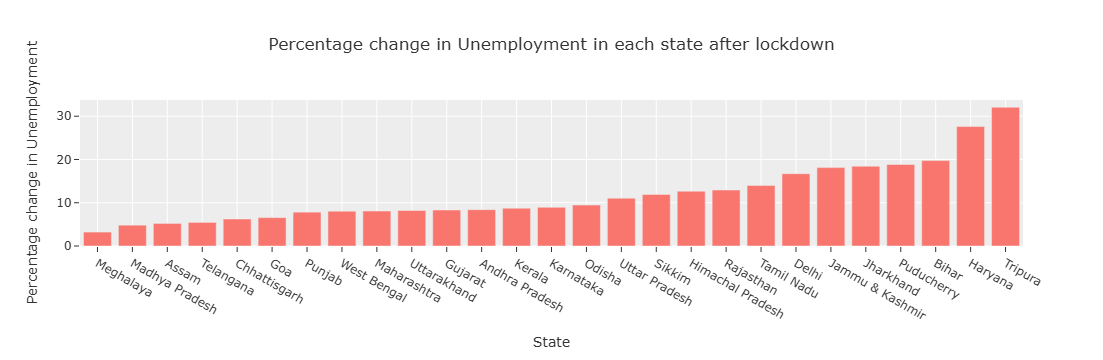

In [76]:
# Rate of change in perecentages

m_lockdown['Percentage change in Unemployment'] = round(m_lockdown['Unemployment Rate after lockdown'] - m_lockdown['Unemployment Rate before lockdown']/m_lockdown['Unemployment Rate before lockdown'],2)
plot_per = m_lockdown.sort_values('Percentage change in Unemployment')

# After lockdown

fig = px.bar(plot_per, x='State', y='Percentage change in Unemployment',title ='Percentage change in Unemployment in each state after lockdown', template = 'ggplot2',barmode= 'relative')
fig.show()